# Building a Neural Network

This notebook is an introduction for building a neural network by first building a neuron then connecting them together to form a simple classifier. We will use MNIST digits dataset and classify images of handwritten digits.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Building a Neuron

Inspired by Neurons present in our brain, the artificial neuron takes several inputs (each a number). A simple artificial neuron multiplies these inputs with their respective weights and sums them together. Finally applies an activation function to obtain the output signal, which can be passed to the next neurons in the network (this can be seen as a directed graph):

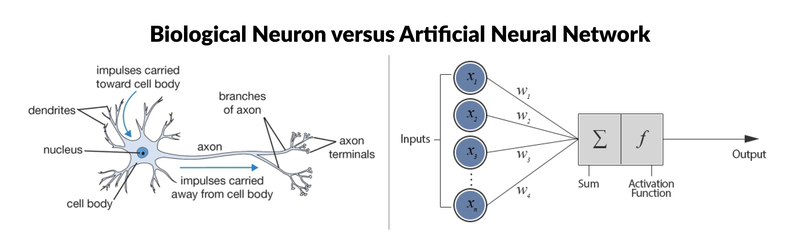


In [ ]:
#Simple Neuron
class Neuron(object):
    def __init__(self, num_inputs, activation):
        super().__init__()
        self.weight = np.random.uniform(size = num_inputs, low = -1.0, high = 1.0)
        self.bias = np.random.uniform(size = 1, low = -1., high = 1.)
        self.activation = activation
        
    def forward(self, x):
        z = np.dot(x, self.weight)+self.bias
        return self.activation(z)

# Activation Function

It’s just a thing function that you use to get the output of node. It is also known as Transfer Function. Activation functions that are commonly used based on few desirable properties like :

* Nonlinear — When the activation function is non-linear, then a two-layer neural network can be proven to be a universal function approximator.

* Range — When the range of the activation function is finite, gradient-based training methods tend to be more stable, because pattern presentations significantly affect only limited weights. 

* Continuously differentiable — This property is desirable (ReLU is not continuously differentiable and has some issues with gradient-based optimization, but it is still possible) for enabling gradient-based optimization methods.



There are many types of activation function in neural networks:

1. Sigmoid Function: Sigmoid functions are used in machine learning for the logistic regression and basic neural network implementations and they are the introductory activation units.
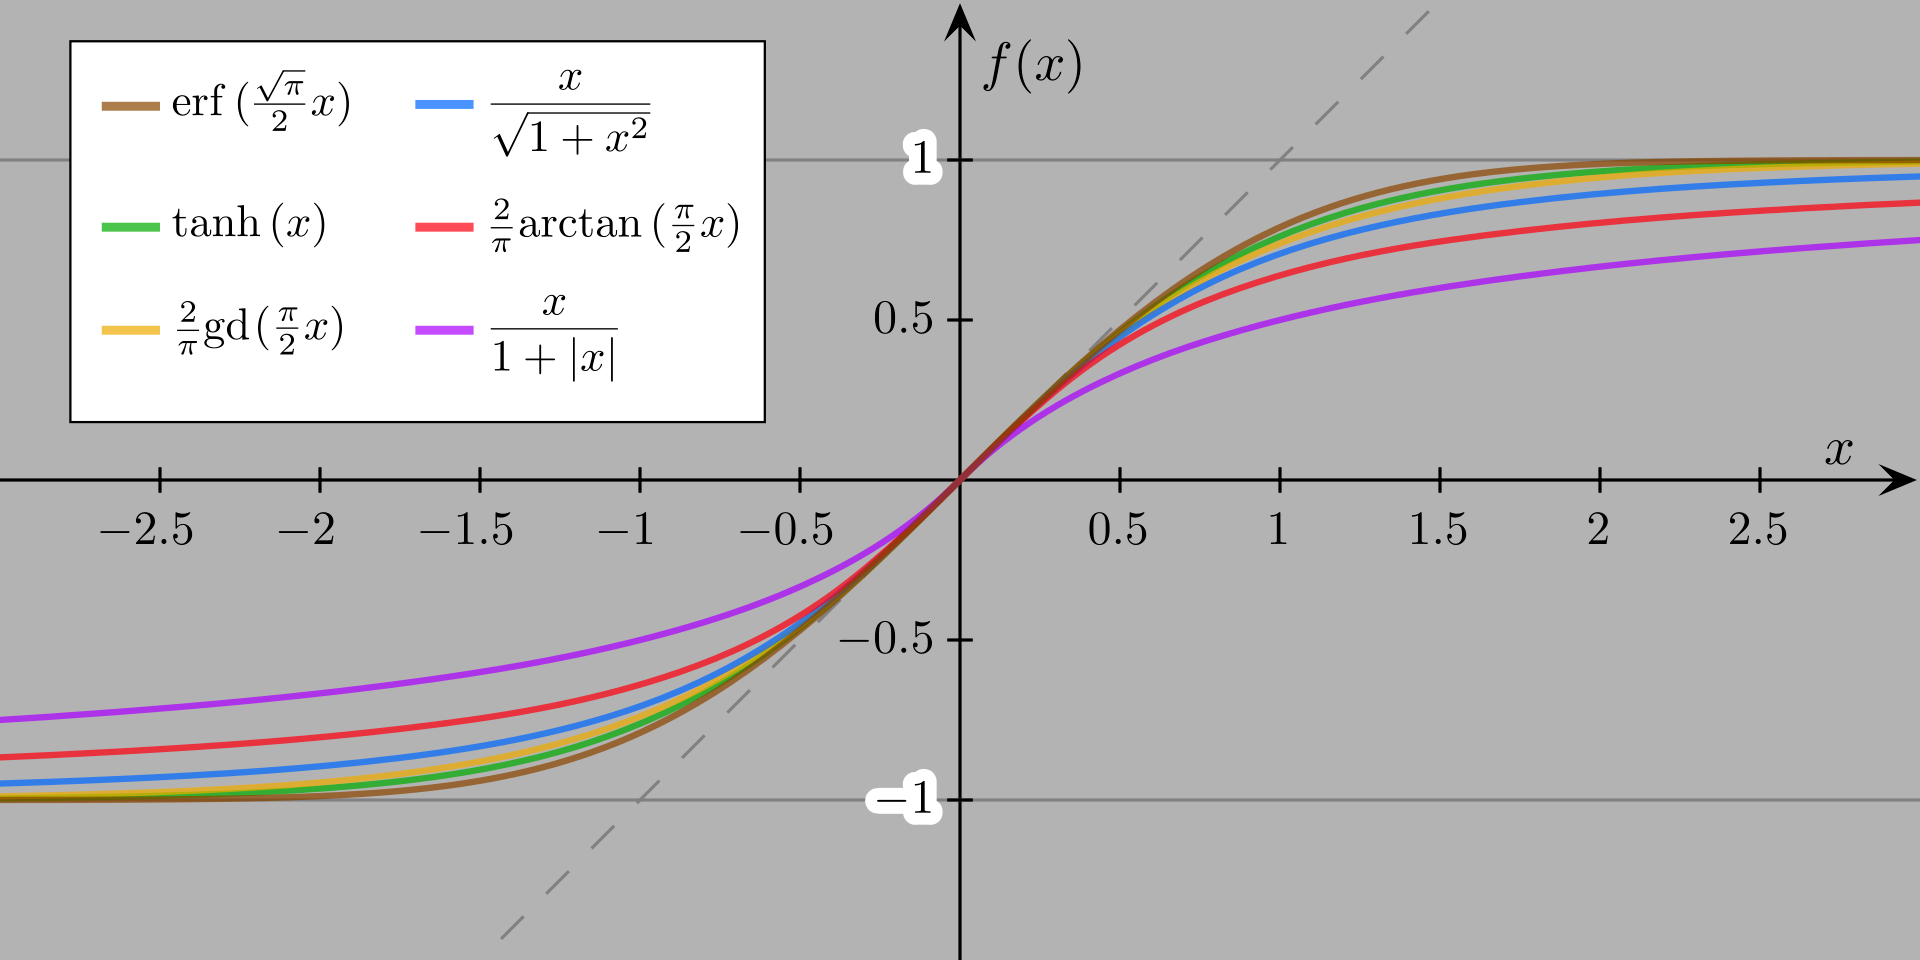



2. Tanh: tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).
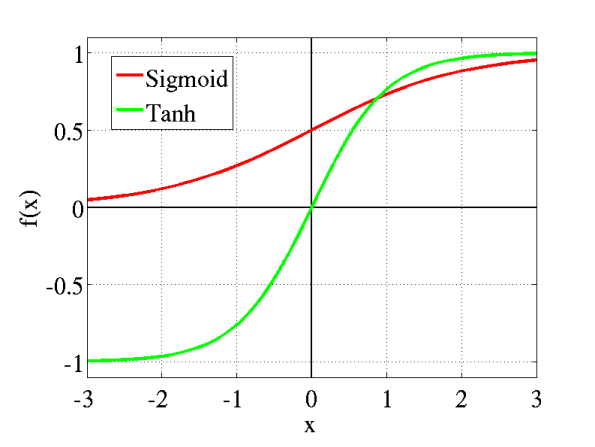



3. Rectified Linear Units (ReLU): Most Deep Learning applications right now make use of ReLU instead of Logistic Activation functions for Computer Vision, Speech Recognition and Deep Neural Networks etc.  A Rectified Linear Unit (A unit employing the rectifier is also called a rectified linear unit ReLU) has output 0 if the input is less than 0, and raw output otherwise.
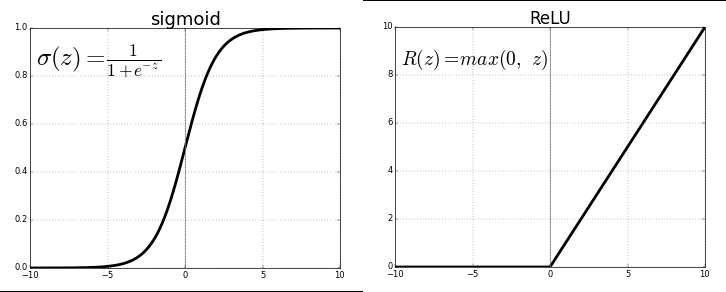



In [ ]:
input_size = 3
#ReLU activation function is used here
function = lambda y: 0 if y<=0 else 1

perceptron = Neuron(num_inputs = input_size, activation = function)
print("Perceptron's random weights = {}, and random bias = {}".format(
perceptron.weight, perceptron.bias))

In [ ]:
x = np.random.rand(input_size).reshape(1, input_size)
print('Input vector : {}'.format(x))

In [ ]:
y = perceptron.forward(x)
print('Output value = {}'.format(y))

# Fully Connected Layers

Usually, neural networks are organized into layers, that is, sets of neurons that typically receive the same input and apply the same operation

In networks, the information flows from the input layer to the output one, with one or more hidden layers in-between. In Figure 1-13, the three neurons A, B, and C, belong to the input layer, the neuron H belongs to the output or activation layer, and the neurons D, E, F, and G belong to the hidden layer. The first layer has an input, x, of size 2, the second (hidden) layer takes the three activation values of the previous layer as input, and so on. Such layers, with each neuron connected to all the values from the previous layer, are classed as being fully-connected or dense:
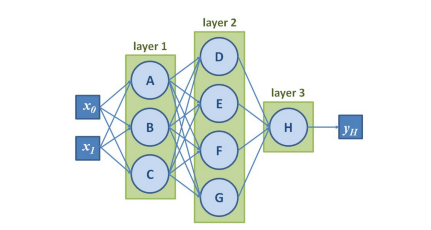

In [ ]:
class FullyConnected(object):
    def __init__(self, num_inputs, layer_size, activation_function, derivated_activation_function = None):
        super().__init__()
        self.W = np.random.standard_normal((num_inputs, layer_size))
        self.b = np.random.standard_normal(layer_size)
        self.size = layer_size
        self.activation = activation_function
        self.derivated = derivated_activation_function
        self.x, self.y = None, None
        self.dL_dW, self.dL_db = None, None
    
    def forward(self, x):
        z = np.dot(x, self.W) + self.b
        self.y = self.activation(z)
        self.x = x
        return self.y
    
    def backward(self, dL_dy):
        dy_dz = self.derivated(self.y)  
        dL_dz = (dL_dy * dy_dz) 
        dz_dw = self.x.T
        dz_dx = self.W.T
        dz_db = np.ones(dL_dy.shape[0]) 

        self.dL_dW = np.dot(dz_dw, dL_dz)
        self.dL_db = np.dot(dz_db, dL_dz)

        dL_dx = np.dot(dL_dz, dz_dx)
        return dL_dx
    
    def optimize(self, epsilon):
        self.W -= epsilon * self.dL_dW
        self.b -= epsilon * self.dL_db

In [ ]:
input_size = 2
neurons = 3
function = lambda y: np.maximum(y, 0)

layer = FullyConnected(num_inputs = input_size, layer_size = neurons, activation_function = function)


In [ ]:
x1 = np.random.uniform(-1, 1, 2).reshape(1, 2)
print("Input vector #1: {}".format(x1))

In [ ]:
x2 = np.random.uniform(-1, 1, 2).reshape(1, 2)
print("Input vector #2: {}".format(x2))

In [ ]:
y1 = layer.forward(x1)
print("Layer's output value given `x1` : {}".format(y1))

In [ ]:
y2 = layer.forward(x2)
print("Layer's output value given `x2` : {}".format(y2))

In [ ]:
x12 = np.concatenate((x1, x2))  # stack of input vectors, of shape `(2, 2)`
y12 = layer.forward(x12)
print("Layer's output value given `[x1, x2]` :\n{}".format(y12))

# Forming a Classifier



The purpose of neural layers is to be stacked together to form a neural network able to perform non-linear predictions.

Applying a gradient descent, such a network can be trained to perform correct predictions. But for that, we need a loss function to evaluate the performance of the network, and we need to know how to derive all the operations performed by the network, to compute and propagate the gradients.

In this section, a simple fully-connected neural network is built. Let us assume we want our network to use the sigmoid function for the activation. We need to implement that function and its derivative:

In [ ]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

def derivated_sigmoid(y):
    return y*(1-y)

In [ ]:
def loss_L2(pred, target):            
    return np.sum(np.square(pred - target))

def derivated_loss_L2(pred, target):
    return 2*(pred - target)

**Binary Cross Entropy Loss**

It converts the predicted probabilities into logarithmic scale before comparing them to the expected values


In [ ]:
def binary_cross_entropy(pred, target):
    return -np.mean(np.multiply(np.log(pred), target) + np.multiply(np.log(1 - pred), (1 - target)))

def derivated_binary_cross_entropy(pred, target):
    return (pred - target) / (pred * (1-pred))

In [ ]:
#Simple Neural Network
class SimpleNetwork(object):
    def __init__(self, num_inputs, num_outputs, hidden_layers_sizes=(64, 32),
                 activation_function=sigmoid, derivated_activation_function=derivated_sigmoid,
                 loss_function=loss_L2, derivated_loss_function=derivated_loss_L2):
        super().__init__()
        layer_sizes = [num_inputs, *hidden_layers_sizes, num_outputs]
        self.layers = [
            FullyConnected(layer_sizes[i], layer_sizes[i + 1], 
                                activation_function, derivated_activation_function)
            for i in range(len(layer_sizes) - 1)]
        self.loss_function = loss_function
        self.derivated_loss_function = derivated_loss_function
    
    def forward(self, x):
        for layer in self.layers: 
            x = layer.forward(x)
        return x
    
    def predict(self, x):
        estimations = self.forward(x)
        best_class = np.argmax(estimations)
        return best_class
    
    def backward(self, dL_dy):
        for layer in reversed(self.layers): 
            dL_dy = layer.backward(dL_dy)
        return dL_dy

    def optimize(self, epsilon):
        for layer in self.layers:            
            layer.optimize(epsilon)
            
    def evaluate_accuracy(self, X_val, y_val):
        num_corrects = 0
        for i in range(len(X_val)):
            pred_class = self.predict(X_val[i])
            if pred_class == y_val[i]:
                num_corrects += 1
        return num_corrects / len(X_val)
    
    def train(self, X_train, y_train, X_val=None, y_val=None, 
              batch_size=32, num_epochs=5, learning_rate=1e-3, print_frequency=20):
        num_batches_per_epoch = len(X_train) // batch_size
        do_validation = X_val is not None and y_val is not None
        losses, accuracies = [], []
        for i in range(num_epochs): 
            epoch_loss = 0
            for b in range(num_batches_per_epoch):  # for each batch composing the dataset
                # Get batch:
                batch_index_begin = b * batch_size
                batch_index_end = batch_index_begin + batch_size
                x = X_train[batch_index_begin: batch_index_end]
                targets = y_train[batch_index_begin: batch_index_end]
                # Optimize on batch:
                predictions = y = self.forward(x)  # forward pass
                L = self.loss_function(predictions, targets)  # loss computation
                dL_dy = self.derivated_loss_function(predictions, targets)  # loss derivation
                self.backward(dL_dy)  # back-propagation pass
                self.optimize(learning_rate)  # optimization of the NN
                epoch_loss += L

            # Logging training loss and validation accuracy, to follow the training:
            epoch_loss /= num_batches_per_epoch
            losses.append(epoch_loss)
            if do_validation:
                accuracy = self.evaluate_accuracy(X_val, y_val)
                accuracies.append(accuracy)
            else:
                accuracy = np.NaN
            if i % print_frequency == 0 or i == (num_epochs - 1):
                print("Epoch {:4d}: training loss = {:.6f} | val accuracy = {:.2f}%".format(
                    i, epoch_loss, accuracy * 100))
        return losses, accuracies

**MNIST Dataset**

In [ ]:
import mnist
X_train, y_train = mnist.train_images(), mnist.train_labels()
X_test,  y_test  = mnist.test_images(), mnist.test_labels()
num_classes = 10

In [ ]:
img_idx = np.random.randint(0, X_test.shape[0])
plt.imshow(X_test[img_idx], cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
X_train, X_test = X_train.reshape(-1, 28 * 28), X_test.reshape(-1, 28 * 28)

In [ ]:
X_train, X_test = X_train / 255., X_test / 255.
print("Normalized pixel values between {} and {}".format(X_train.min(), X_train.max()))

In [ ]:
y_train = np.eye(num_classes)[y_train]

In [ ]:
mnist_classifier = SimpleNetwork(num_inputs=X_train.shape[1], 
                                 num_outputs=num_classes, hidden_layers_sizes=[64, 32])

In [ ]:
predictions = mnist_classifier.forward(X_train)                         
loss_untrained = mnist_classifier.loss_function(predictions, y_train)   

accuracy_untrained = mnist_classifier.evaluate_accuracy(X_test, y_test) 
print("Untrained : training loss = {:.6f} | val accuracy = {:.2f}%".format(
    loss_untrained, accuracy_untrained * 100))

In [ ]:
losses, accuracies = mnist_classifier.train(X_train, y_train, X_test, y_test, 
                                            batch_size=30, num_epochs=500)

In [ ]:
losses, accuracies = [loss_untrained] + losses, [accuracy_untrained] + accuracies
fig, ax_loss = plt.subplots()

color = 'red'
ax_loss.set_xlim([0, 510])
ax_loss.set_xlabel('Epochs')
ax_loss.set_ylabel('Training Loss', color=color)
ax_loss.plot(losses, color=color)
ax_loss.tick_params(axis='y', labelcolor=color)

ax_acc = ax_loss.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax_acc.set_xlim([0, 510])
ax_acc.set_ylim([0, 1])
ax_acc.set_ylabel('Val Accuracy', color=color)
ax_acc.plot(accuracies, color=color)
ax_acc.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
predicted_class = mnist_classifier.predict(np.expand_dims(X_test[img_idx], 0))
print('Predicted class: {}; Correct class: {}'.format(predicted_class, y_test[img_idx]))

# Result

You can see above that the classifier attained an accuracy of nearly 95%

**Refrences**
1. Rosenblatt, F., 1958. The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review 65, 386.

2. LeCun, Y., Cortes, C., Burges, C., 2010. MNIST handwritten digit database. AT&T Labs [Online]. Available: http://yann.lecun.com/exdb/mnist 2, 18.

3. Planche, Benjamin; Andres, Eliot. Hands-On Computer Vision with TensorFlow 2 

